# Higher-order networks

In this notebook, we will
1. Create
   1. Hypergraphs
   2. Simplicial complexes
   3. Dihypergraphs
2. Explore simple properties
3. Visualize these networks

in XGI.

We start off by loading the XGI library.

In [1]:
import xgi
import matplotlib.pyplot as plt

In [2]:
xgi.__version__

'0.8.2'

### Creating a hypergraph

Creating a hypergraph can be done in several ways, but here, we will build a hypergraph node-by-node and edge-by-edge.

In [3]:
H_build = xgi.Hypergraph()
H_build.add_edge([1, 2], id="a")
H_build.add_node(0)
H_build.add_edges_from([[3, 4], [0, 2, 3]])
H_build.add_nodes_from([9, 10])

XGI automatically assigns unique edge IDs (if a user doesn't specify the ID)

In [4]:
H_build.edges

EdgeView(('a', 0, 1))

Why NodeViews and EdgeViews? These allow users to access many different properties and data structures from nodes and edges in a much simpler way. We will cover this more in depth later. For now, we can get the edges of which each node is a part and the nodes in each edge as follows:

In [5]:
print("List of node memberships and edge members:")
print(H_build.nodes.memberships())
print(H_build.edges.members())
print("\nMemberships of a particular node and members of a particular edge:")
print(H_build.nodes.memberships(2))
print(H_build.edges.members("a"))

List of node memberships and edge members:
{1: {'a'}, 2: {1, 'a'}, 0: {1}, 3: {0, 1}, 4: {0}, 9: set(), 10: set()}
[{1, 2}, {3, 4}, {0, 2, 3}]

Memberships of a particular node and members of a particular edge:
{1, 'a'}
{1, 2}


In [6]:
print(H_build)

Unnamed Hypergraph with 7 nodes and 3 hyperedges


### Creating a simplicial complex

By definition, a simplicial complex $K$ is valid if for any simplex $\sigma \in K$, all faces $\omega \subset \sigma$ are also $\omega \in K$. The functions ``SC.add_simplex`` and ``SC.add_simplices_from`` take care of this directly.

We can check this easily by asking how many edges are present in the simplicial complex versus the hypergraph.
Previously, when we added the simplex/hyperedge ``[0, 2, 3]``, there were no sub-edges. The closure requirement means that the three edges (``[0, 2], [0, 3], [2, 3]``) must be added as well.

We will build a simplicial complex node-by-node and edge-by-edge. This is different than a hypergraph in that *downward closure* is satisfied where every possible sub-interaction exists.

In [7]:
SC_build = xgi.SimplicialComplex()
SC_build.add_simplex([1, 2], id="a")
SC_build.add_node(0)
SC_build.add_simplices_from([[3, 4], [0, 2, 3]])
SC_build.add_nodes_from([9, 10])

In [8]:
print(SC_build)

Unnamed SimplicialComplex with 7 nodes and 6 simplices


In [9]:
print(H_build.edges.members())
print([set(e) for e in SC_build.edges.members()])

[{1, 2}, {3, 4}, {0, 2, 3}]
[{1, 2}, {3, 4}, {0, 2, 3}, {2, 3}, {0, 2}, {0, 3}]


/Users/nicholaslandry/miniconda3/envs/demo/lib/python3.11/site-packages/xgi/linalg/hypergraph_matrix.py:185: UserWarning: Forming the adjacency matrix can be expensive when there are isolated nodes!
  warn(
/Users/nicholaslandry/miniconda3/envs/demo/lib/python3.11/site-packages/xgi/drawing/draw.py:1487: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


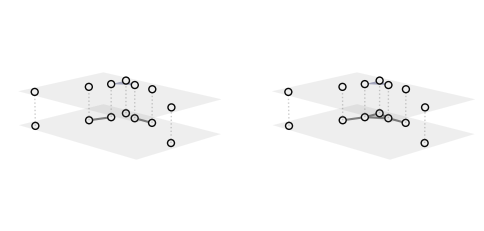

In [10]:
fig = plt.figure(figsize=(6, 4))
pos = xgi.pairwise_spring_layout(H_build, seed=0)
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
xgi.draw_multilayer(H_build, ax=ax1, pos=pos, h_angle=15, v_angle=45)
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
xgi.draw_multilayer(SC_build, ax=ax2, pos=pos, h_angle=15, v_angle=45)
plt.show()

### Creating a directed hypergraph (dihypergraph)

We will build a directed hypergraph node-by-node and edge-by-edge. Each edge now contains a set of inputs (tail) and outputs (head).

In [11]:
DH = xgi.DiHypergraph()

DH.add_node(1, name="test")
DH.add_edge(
    [{1, 2, 3}, {3, 4}]
)  # Notice that the head and the tail need not be disjoint.

DH.add_nodes_from([4, 5, 6])
edges = [[{1, 2}, {5, 6}], [{4}, {1, 3}]]
DH.add_edges_from(edges)
DH["name"] = "test"

print("Now that we've added nodes and edges, we have a " + str(DH))


Now that we've added nodes and edges, we have a DiHypergraph named test with 6 nodes and 3 hyperedges


(<Axes: >,
 (<matplotlib.collections.PathCollection at 0x177b65e50>,
  <matplotlib.collections.PathCollection at 0x177b6ea10>))

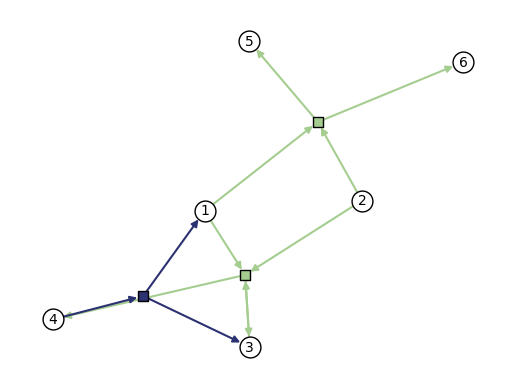

In [12]:
xgi.draw_dihypergraph(DH, node_labels=True, node_size=15)

In [13]:
print("Edge 0:")
print(f"directed edge: {DH.edges.dimembers(0)}")
print(f"undirected edge: {DH.edges.members(0)}")
print(f"tail: {DH.edges.tail(0)}")
print(f"head: {DH.edges.head(0)}")

Edge 0:
directed edge: ({1, 2, 3}, {3, 4})
undirected edge: {1, 2, 3, 4}
tail: {1, 2, 3}
head: {3, 4}
